In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/datasets/UcClass"

In [7]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
#import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras import Model, layers

train_dir = '/content/drive/My Drive/datasets/UcClass/train'
validation_dir = '/content/drive/My Drive/datasets/UcClass/val'

#train_dir = 'train'
#validation_dir = 'val'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    preprocessing_function=preprocess_input)
 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='categorical',
    target_size=(224,224))
 
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input)
 
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=32,
    shuffle=False,
    class_mode='categorical',
    target_size=(224,224))

conv_base = MobileNetV2(include_top=False,
                     weights='imagenet',
                     input_shape=(224, 224, 3))
for layer in conv_base.layers:
    layer.trainable = False

#x = layers.Dense(256, activation='relu')(x)
#x = layers.BatchNormalization()(x)
#x = layers.Dropout(0.2)(x)
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
#x = layers.Dense(64, activation='relu')(x)
#x = layers.BatchNormalization()(x)
x = layers.Dense(32, activation='relu')(x)

predictions = layers.Dense(3, activation='softmax')(x) #3 class sayımız
model = Model(conv_base.input, predictions)

#optimizer = tf.keras.optimizers.RMSprop(lr=1e-4)
optimizer = tf.keras.optimizers.Adam(lr=1e-4)
#optimizer = tf.keras.optimizers.Adamax(lr=1e-2, beta_1=0.9, beta_2=0.999)
#optimizer = tf.keras.optimizers.Adadelta(lr=1.0, rho=0.95)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()


Found 4640 images belonging to 3 classes.
Found 1163 images belonging to 3 classes.
Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1_pad (ZeroPadding2D)       (None, 225, 225, 3)  0           input_3[0][0]                    
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         Conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
________

In [8]:
history = model.fit_generator(
    generator=train_generator,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size, 
    validation_steps=validation_generator.n//validation_generator.batch_size,
    epochs=100)

Epoch 1/100
145/145 [==============================] - 172s 1s/step - loss: 0.9826 - accuracy: 0.4929 - val_loss: 0.9746 - val_accuracy: 0.5000
Epoch 2/100
145/145 [==============================] - 173s 1s/step - loss: 0.9720 - accuracy: 0.5045 - val_loss: 0.9674 - val_accuracy: 0.5000
Epoch 3/100
145/145 [==============================] - 173s 1s/step - loss: 0.9713 - accuracy: 0.5045 - val_loss: 0.9644 - val_accuracy: 0.5000
Epoch 4/100
145/145 [==============================] - 174s 1s/step - loss: 0.9686 - accuracy: 0.5043 - val_loss: 0.9607 - val_accuracy: 0.5000
Epoch 5/100
145/145 [==============================] - 174s 1s/step - loss: 0.9684 - accuracy: 0.5041 - val_loss: 0.9551 - val_accuracy: 0.5000
Epoch 6/100
145/145 [==============================] - 174s 1s/step - loss: 0.9657 - accuracy: 0.5082 - val_loss: 0.9524 - val_accuracy: 0.5000
Epoch 7/100
145/145 [==============================] - 173s 1s/step - loss: 0.9643 - accuracy: 0.5052 - val_loss: 0.9488 - val_accuracy:

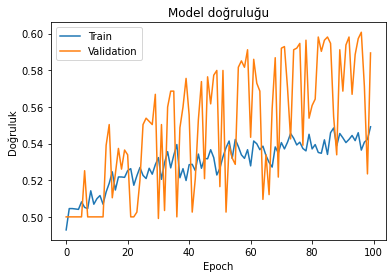

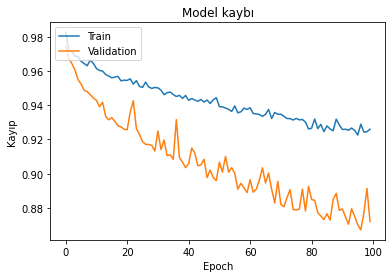

In [9]:
model.save('/content/drive/My Drive/datasets/UcClass/A410_2modelMobileNetV2AdamE100.h5')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()